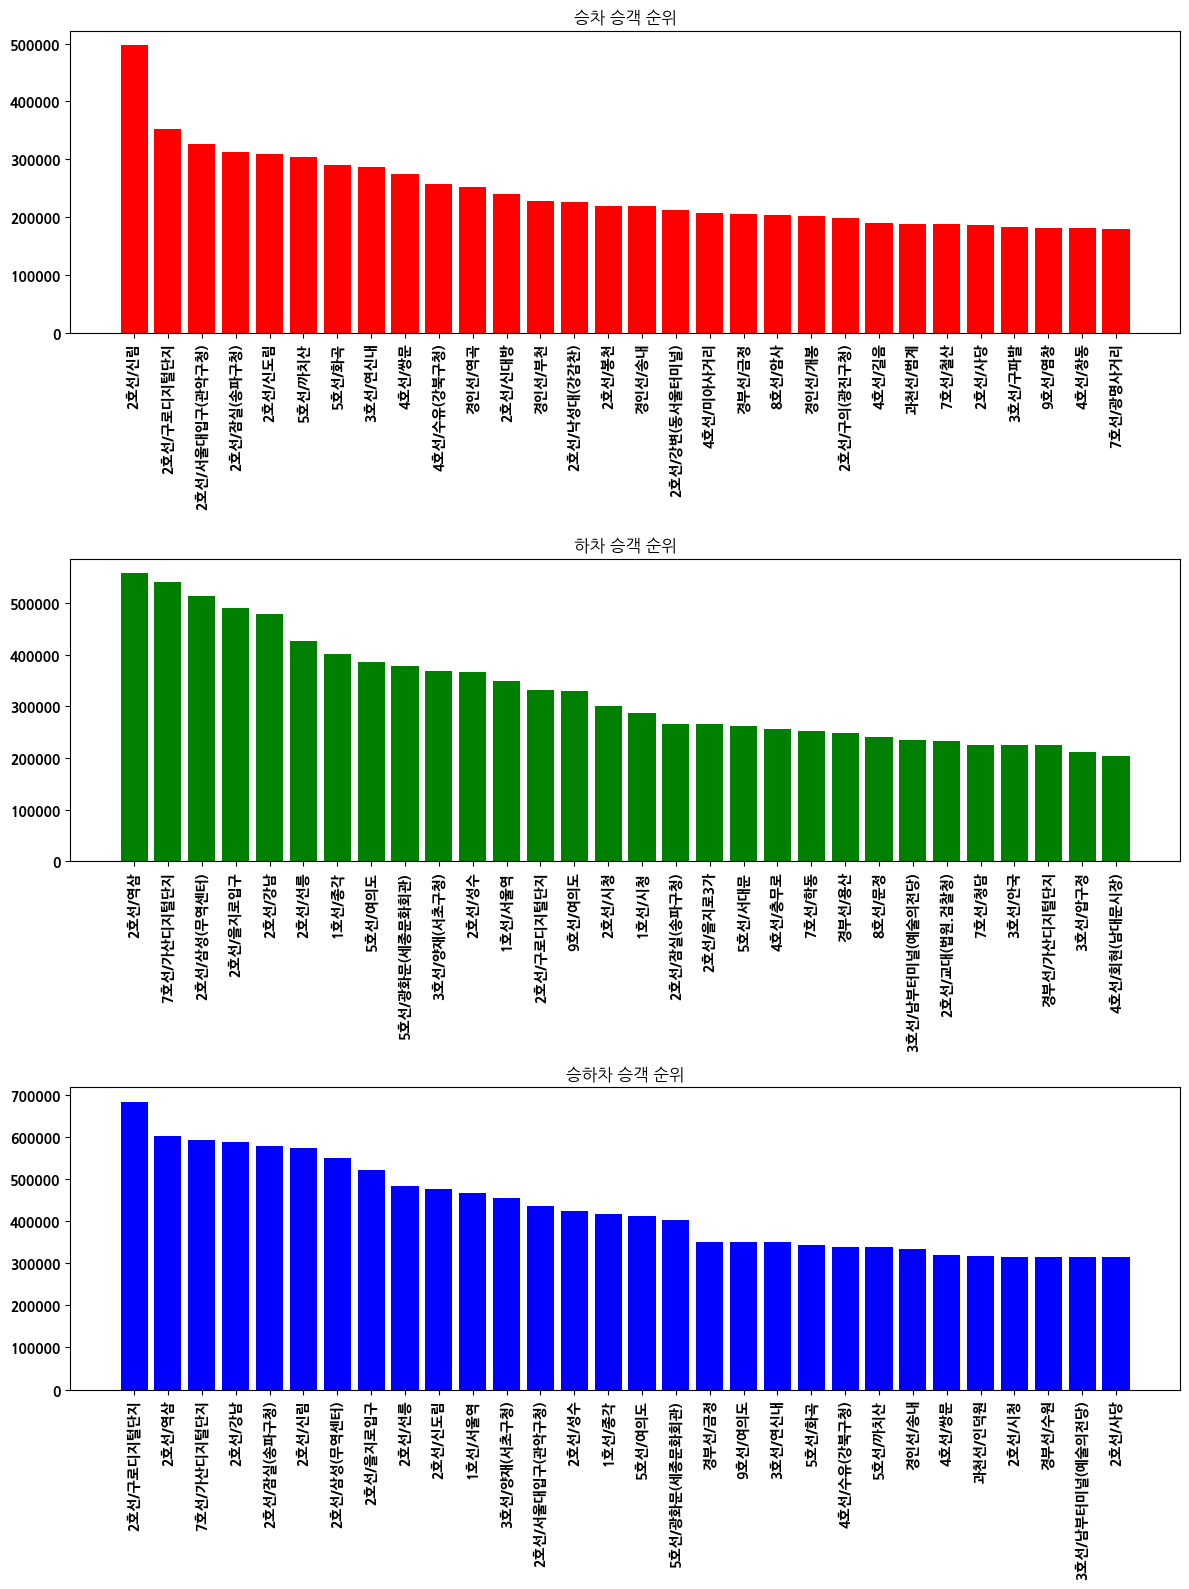

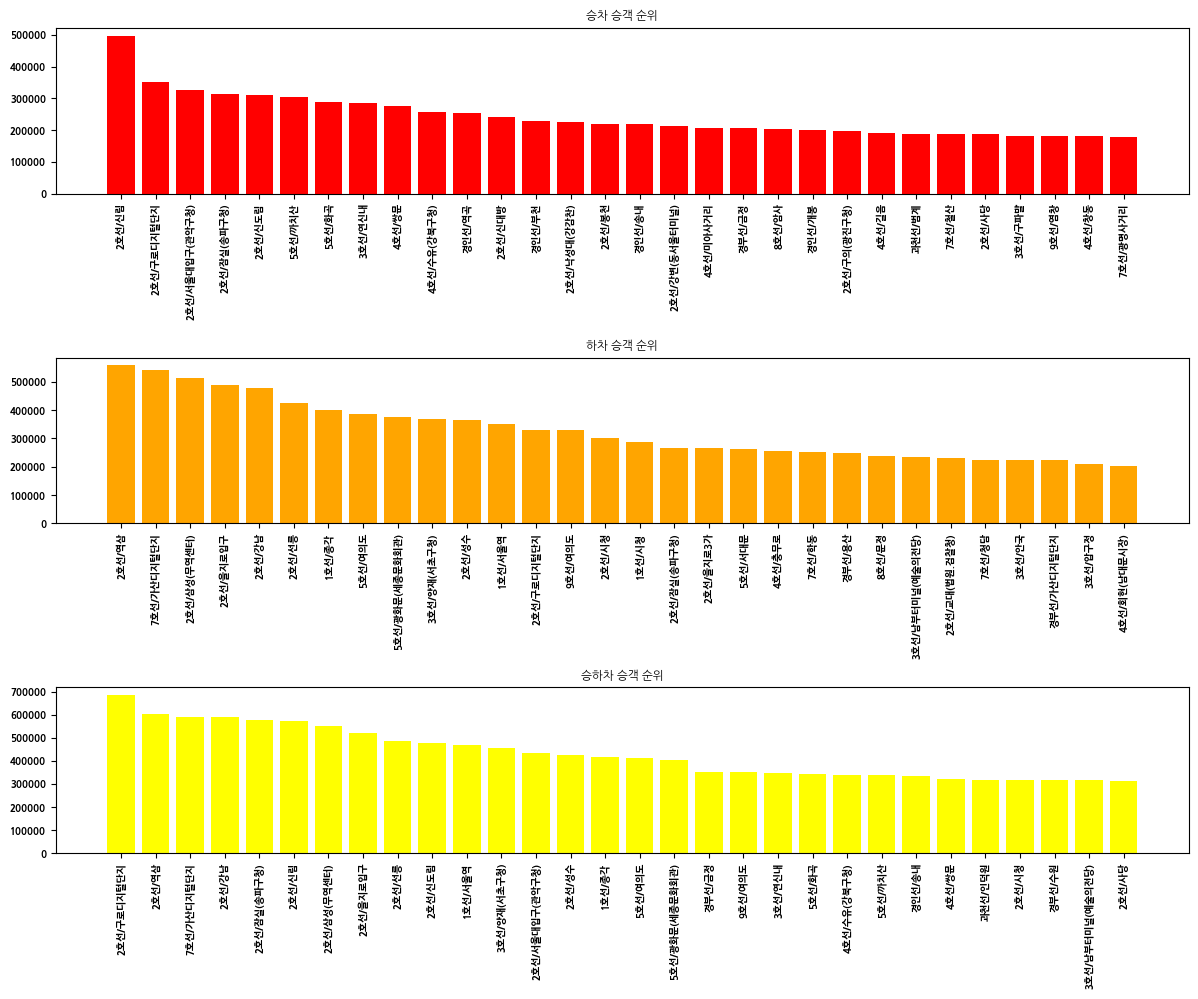

In [11]:
import matplotlib.pyplot as plt
import csv

def main():
    f = open('202303.sub.csv', 'r', encoding='cp949')
    data = csv.reader(f, delimiter=',')
    header = next(data)

    get_on = []
    get_off = []
    onoff = []
    top_on_station = []
    top_on_passenger = []
    top_off_station = []
    top_off_passenger = []
    top_onoff_station = []
    top_onoff_passenger = []

    for row in data:
        row = list(map(lambda s: ''.join(s.split()), row))

        on_passenger = int(row[9]) + int(row[11])
        off_passenger = int(row[10]) + int(row[12])
        onoff_passenger = on_passenger + off_passenger

        on_passenger_ = [row[1] + '/' + row[2], on_passenger]
        off_passenger_ = [row[1] + '/' + row[2], off_passenger]
        onoff_passenger_ = [row[1] + '/' + row[2], onoff_passenger]

        get_on.append(on_passenger_)
        get_off.append(off_passenger_)
        onoff.append(onoff_passenger_)

    get_on.sort(key=lambda x: -x[1])
    get_off.sort(key=lambda x: -x[1])
    onoff.sort(key=lambda x: -x[1])

    for i in range(30):
        top_on_station.append(get_on[i][0])
        top_on_passenger.append(get_on[i][1])
        top_off_station.append(get_off[i][0])
        top_off_passenger.append(get_off[i][1])
        top_onoff_station.append(onoff[i][0])
        top_onoff_passenger.append(onoff[i][1])

    f.close()

 
    plt.rcParams['font.size'] = 7


    fig, axs = plt.subplots(3, 1, figsize=(12, 10))

    axs[0].bar(top_on_station, top_on_passenger, color='r')
    axs[0].set_title("승차 승객 순위")
    axs[0].tick_params(axis='x', rotation=90)

    axs[1].bar(top_off_station, top_off_passenger, color='orange')
    axs[1].set_title("하차 승객 순위")
    axs[1].tick_params(axis='x', rotation=90)

    axs[2].bar(top_onoff_station, top_onoff_passenger, color='yellow')
    axs[2].set_title("승하차 승객 순위")
    axs[2].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()
